# 히트맵

색상으로 표현할 수 있는 다양한 정보를 일정한 이미지위에 열분포 형태의 시각화 하는 방법이다.

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
flights = pd.read_csv('./data/flight.csv')
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


pivot() 함수를 이용하여 월별 연도별 승객수를 집계한 피벗 테이블(pivot table)을 만들어서, 이를 이용해서 이어서 히트맵을 그려보자.

In [3]:
df = flights.pivot('month', 'year', 'passengers')
df


year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
April,129,135,163,181,235,227,269,313,348,348,396,461
August,148,170,199,242,272,293,347,405,467,505,559,606
December,118,140,166,194,201,229,278,306,336,337,405,432
February,118,126,150,180,196,188,233,277,301,318,342,391
January,112,115,145,171,196,204,242,284,315,340,360,417
July,148,170,199,230,264,302,364,413,465,491,548,622
June,135,149,178,218,243,264,315,374,422,435,472,535
March,132,141,178,193,236,235,267,317,356,362,406,419
May,121,125,172,183,229,234,270,318,355,363,420,472


### matplotlib 히트맵

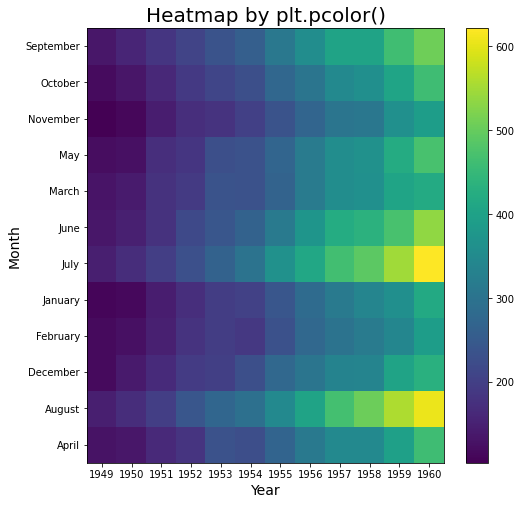

In [4]:
# heatmap by plt.pcolor()

plt.figure(figsize=(8,8))
plt.pcolor(df)
plt.xticks(np.arange(0.5, len(df.columns), 1), df.columns)
plt.yticks(np.arange(0.5, len(df.index), 1), df.index)
plt.title('Heatmap by plt.pcolor()', fontsize=20)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Month', fontsize=14)
plt.colorbar()

plt.show()


### seaborn 히트맵

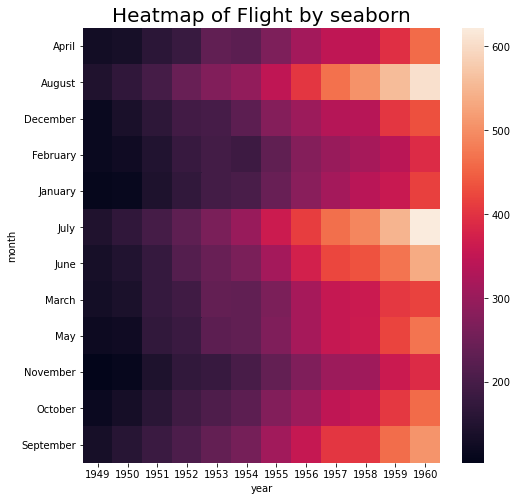

In [5]:
# heatmap by seaborn

plt.figure(figsize=(8,8))

ax = sns.heatmap(df)

plt.title('Heatmap of Flight by seaborn', fontsize=20)

plt.show() 


이번에는 annot=True argument를 써서 각 셀에 숫자를 표시 할 수 있다. 

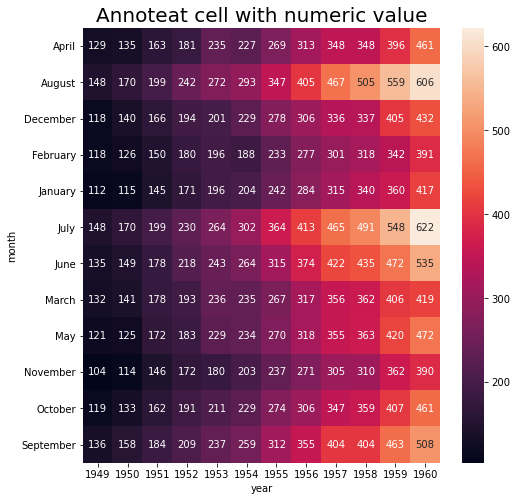

In [6]:
# annotate each cell with the numeric value of integer format

plt.figure(figsize=(8,8))

sns.heatmap(df, annot=True, fmt='d')

plt.title('Annoteat cell with numeric value', fontsize=20)

plt.show()


cmap 에 색깔을 다르게 설정할 수 있다. 

참고) cmap https://matplotlib.org/3.2.1/tutorials/colors/colormaps.html )

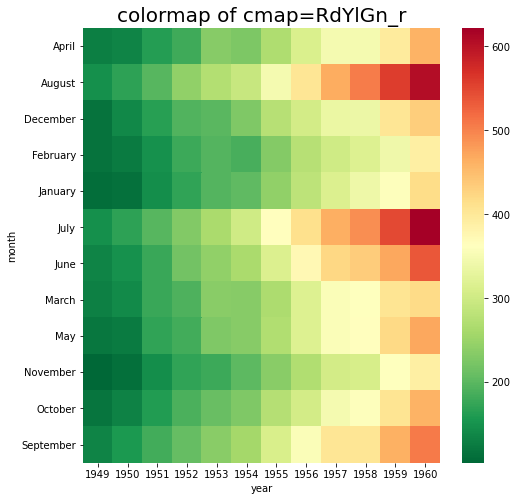

In [7]:
# different colormap

plt.figure(figsize=(8,8))

sns.heatmap(df, cmap='RdYlGn_r')

plt.title('colormap of cmap=RdYlGn_r', fontsize=20)

plt.show()

### Pandas 히트맵
pandas를 이용한 히트맵 그리기 (Heatmap by pandas)

pandas는 df.style.background_gradient(cmap='summer')를 사용해서 DataFrame에 숫자에 따라서 직접 색을 다르게 입힐 수 가 있다.

In [8]:
?df.style.background_gradient

In [9]:
# heatmap by pandas

df.style.background_gradient(cmap='Blues', axis=None)

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
April,129,135,163,181,235,227,269,313,348,348,396,461
August,148,170,199,242,272,293,347,405,467,505,559,606
December,118,140,166,194,201,229,278,306,336,337,405,432
February,118,126,150,180,196,188,233,277,301,318,342,391
January,112,115,145,171,196,204,242,284,315,340,360,417
July,148,170,199,230,264,302,364,413,465,491,548,622
June,135,149,178,218,243,264,315,374,422,435,472,535
March,132,141,178,193,236,235,267,317,356,362,406,419
May,121,125,172,183,229,234,270,318,355,363,420,472


## 히트맵으로 상관계수 시각화

In [10]:
iris = pd.read_csv('./data/iris.csv')
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [11]:
iris.drop(['species'], axis=1, inplace=True)

In [12]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [13]:
corr_df = iris.corr().round(2)
corr_df

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.00,-0.12,0.87,0.82
sepal_width,-0.12,1.00,-0.43,-0.37
petal_length,0.87,-0.43,1.00,0.96
petal_width,0.82,-0.37,0.96,1.00


### Matplotlib

컬러 목록 확인 https://matplotlib.org/stable/tutorials/colors/colormaps.html


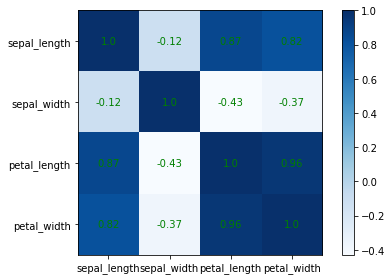

In [14]:
fig, ax = plt.subplots()
im = ax.imshow(corr_df, cmap='Blues')

# Color Bar
cbar = ax.figure.colorbar(im, ax=ax)

ax.set_xticks(np.arange(len(corr_df.columns)))
ax.set_yticks(np.arange(len(corr_df.index)))

ax.set_xticklabels(corr_df.columns)
ax.set_yticklabels(corr_df.columns)

for x in range(len(corr_df.columns)):
    for y in range(len(corr_df.index)):
        ax.text(y, x, corr_df.iloc[y, x], ha='center', va='center', color='g')

fig.tight_layout()   
plt.show()    

### Seaborn

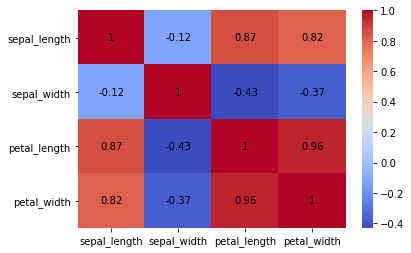

In [15]:
ax = sns.heatmap(corr_df, annot=True, annot_kws=dict(color='k'), cmap='coolwarm')
plt.show()

상관계수에서 대각선은 해당 변수 자체와의 상관계수로 항상 1이 된다. 
대각선을 기준으로 상삼각, 하삼각이 대칭을 이루고 있다. 

상관계수 heatmap에서 하삼각 부분만을 출력하도록 해보자.  

heatmap() 안에 있는 mask 인수를 활용할 예정이다. mask는 각 값이 만약 True일 경우 Cell의 값이 보이지 않도록 해주는 기능이다.
이 때, np.triu() 함수를 활용하여 매트릭스의 우측상단을 모두 1로 만들어서 True값을 만든다.

In [16]:
mask = np.triu(np.ones_like(corr_df))
print(mask)

[[1. 1. 1. 1.]
 [0. 1. 1. 1.]
 [0. 0. 1. 1.]
 [0. 0. 0. 1.]]


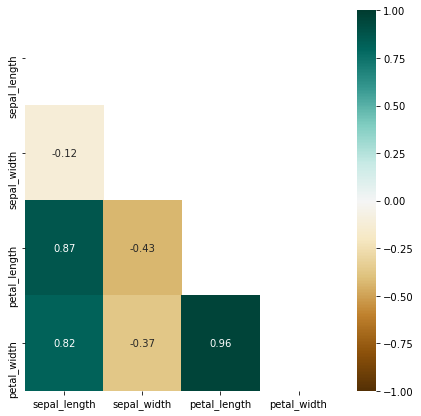

In [17]:
fig, ax = plt.subplots(figsize=(7, 7))

#  기본 그래프 [Basic Correlation Heatmap]
sns.heatmap(corr_df, 
            mask=mask, 
            vmin=-1, 
            vmax = 1, 
            annot=True, 
            cmap="BrBG", 
            cbar = True)

plt.show()

In [18]:
# pandas로 상관계수 행렬을 히트맵으로 표시한다.
corr_df.style.background_gradient(cmap='coolwarm', axis=None)

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.120000,0.870000,0.820000
sepal_width,-0.120000,1.000000,-0.430000,-0.370000
petal_length,0.870000,-0.430000,1.000000,0.960000
petal_width,0.820000,-0.370000,0.960000,1.000000


# 히트맵 실습

1. './data/stock_px.csv' 에는 2003년 1월에서 2011년 10월 사이의 미국 주식 주가 데이터를 포함하고 있다. 
```
df = pd.read_csv('./data/stock_px.csv', parse_dates=True, index_col=0)
df.info()
```
* date : 날짜
* AAPL : 애플 주가
* MSFT : 마이크로소프트 주가
* XOM : 엑슨모빌 주가
* SPX : S&P 500 지수 

2. 변수의 상관계수를 히트맵으로 시각화 하시오.